# 1. Import images

In [8]:
import scipy.io
data = scipy.io.loadmat('data/ex3data1.mat')

# A 5000x400matrix, each row representing a 20x20 pixel image
X = data['X']

# A 5000-dimensional matrix, each element representing the number shown in the corresponding image
Y = data['y'].reshape(5000)

# 2. Display selection of images

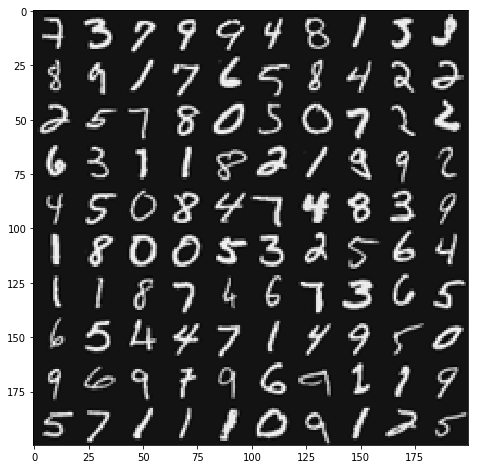

In [7]:
import numpy as np
import random
from matplotlib import pyplot as plt

img_arr = np.empty([20, 220])
for j in range(0, 10):
    img_row = np.empty([20, 20])
    for i in range(0, 10):
        img = X[random.randint(1, 5000)].reshape(20, 20)
        img_row = np.concatenate((img_row, img), axis=1)
    img_arr = np.concatenate((img_arr, img_row), axis=0)

plt.figure(figsize=(12,8))
plt.imshow(img_arr[20:, 20: ].T, interpolation="nearest", cmap='gray')

# Show random selection of 100 images using imshow
plt.show()